###I want to compare the rhizosphere responders from Shengjing's experiment to my mineral-responsive OTUs - are they consistently "weedy" organisms?

In [3]:
from Bio import SeqIO
from Bio import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
import numpy as np
from rpy2.robjects import pandas2ri

In [4]:
%load_ext rpy2.ipython
# Turning on in-IPy R capabilities

In [185]:
%load_ext mothurmagic
# Loads mothurmagic so we can run mothur in the notebook using %%mothur at the top of the cell

The mothurmagic extension is already loaded. To reload it, use:
  %reload_ext mothurmagic


In [4]:
%%mothur
help()

TypeError: cannot concatenate 'str' and 'exceptions.OSError' objects

In [5]:
%%R
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(RColorBrewer)
# Loading R libraries.

/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘plyr’


  warnings.warn(x, RRuntimeWarning)
/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:reshape’:

    rename, round_any


  warnings.warn(x, RRuntimeWarning)
/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  warnings.warn(x, RRuntimeWarning)
/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:reshape’:

    rename


  warnings.warn(x, RRuntimeWarning)
/opt/virt_en

In [234]:
%%R
#detach("package:plyr", unload=TRUE)


Error in detach("package:plyr", unload = TRUE) : invalid 'name' argument


In [342]:
%%R
#detach("package:reshape", unload=TRUE)
#detach("package:phyloseq", unload=TRUE)
#detach("package:ggplot2", unload=TRUE)
#detach("package:dplyr", unload=TRUE)


In [187]:
! head ../data/mBioRootRespOTUseqs.fasta
#These are the sequences for the OTUs

>OTU_0
TACGGAGGGTGCGAGCGTTGTCCGGAATCATTGGGCGTAAAGGGCGCGTAGGTGGCCCGGTCAGTCTTTGGTGAAAGCGCGGGGCTCAACCCTGCGTCGGCCAGGGATACTGCCGCGGCTCGAGCACTGTAGAGGCAGGCGGAATTCCGGGTGTAGCGGTGGAATGCGTAGAGATCCGGAAGAACACCGGTGGCGAAGGCGGCCTGCTGGGCAGTTTTGCTGACACTGAGGCGAGACAGCGTGGGGAGCAAACAGG
>OTU_1
TACGGGTGGCGCTAGTGTTATTCTTCTTCATTGGGCGTAAAGGGTGCGTAGGCAGTAAAATAAGTTCTAAGTAACAACGTAAACAGAGAGCATTTCGATTACTTTCCATACTATTTTTCTAGAGTATTATAAGATATAATGGATCCTTTAATAAAGAATTTAAATGCGTTGGAATATTAAATAGGACGCCAAATACAAAAGTAATTATCTACGGAGATACTGACGCTGAGGCACTAAGGCATGGGGAGCGAATAGG
>OTU_10
GACGTAGGTGGCGAACGTTATCCGGAATTATTGGGCGTAAAGGGTGCGTAGATGGCTTGATAAGTTAGTAGTGGGAAATCGAGGCTCAACCTCGTGGAAGCTGGTAATACTGTCAGGCTCGAGTGCAGGAGAGGTTAACGGAACTCCATGTGGAGCGGTAAAATGTGTAGATATATGGAAGAACACCAATAACGGCGAAGGCAGTTAACTATTCTGTTACTGACATTGAGGCACGAAAGCGTGGGGAGCAAAACGG
>OTU_100
GACATAGGTCGCAAACGTTATCCGGAATTATTGGGCGTAAAGGGTGCGTAGATGGTATGATAAGTTAGCGGTGGGAAATCGAGGCTCAACCTCGTGGAAGCTGATAATACTGTTGTACTTGAGTACAGAAGAGGTTAACGGAACTCCATGTGGAGCGGTAAAATGCATCGATATATGGAAGAACACCAATAACGGCGA

In [6]:
%%R
RootResp = read.csv("../data/mBioRootResp.csv")
head(RootResp)
# These are the actual responders, by week.
# I might want to pull out which OUTs are (ever) responsive,
# noting for which weeks/seasons, and contrast with mineral responses
# Basically a table, with OTU, Time responding, Minerals responding
# Really, I should reclassify the OTUs, from both groups, to see which correspond to which

  Season Week        OTU   Domain        Phylum             Class        Order
1      2   12   OTU_7765 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
2      2   12   OTU_4672 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
3      2   12  OTU_70195 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
4      2   12  OTU_13997 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
5      2   12 OTU_226052 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
6      2   12  OTU_18471 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
        Family        Genus rhizo_enriched rhizo_depleted pvals_adj.adj...1.
1 Unclassified  Terriglobus              1              0        7.51000e-11
2 Unclassified Edaphobacter              1              0        4.59000e-10
3 Unclassified Edaphobacter              1              0        6.12000e-10
4 Unclassified  Terriglobus              1              0        1.77000e-05
5 Unclassified Edaphobacter              1              0     

In [7]:
%%R
RootResponders = RootResp %>%
    filter(rhizo_enriched==1)
# Making a list of the Root Responders

In [8]:
%%R
# We can forget about the parameters that are not phylogenetic IDs  (pvals)
# Just reshape by OTU.
RootResponders = cast(RootResponders, OTU+Domain+Phylum+Class+Order+Family+Genus~Season+Week)
head(RootResponders)
# Nice. This gives us a table of all the OTUs that respond every, and which weeks they respond in
# Now the question is, how to combine this with my own OTUs.
# One option could be to build a tree with the combined OTUs, some of which
# may be basically the same, and to colour the rings by response.
# Not sure if that makes sense.
# What do I really want to say?

/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Using P as value column.  Use the value argument to cast to override this choice

  warnings.warn(x, RRuntimeWarning)


         OTU   Domain           Phylum              Class              Order
1      OTU_0 Bacteria Gemmatimonadetes   Gemmatimonadetes   Gemmatimonadales
2 OTU_100042 Bacteria Gemmatimonadetes   Gemmatimonadetes   Gemmatimonadales
3 OTU_100429 Bacteria   Proteobacteria Betaproteobacteria    Burkholderiales
4 OTU_100503 Bacteria   Proteobacteria Betaproteobacteria    Burkholderiales
5 OTU_100822 Bacteria    Bacteroidetes    Sphingobacteria Sphingobacteriales
6 OTU_100823 Bacteria   Proteobacteria Betaproteobacteria    Burkholderiales
             Family        Genus 1_3 1_6 1_9 1_12 2_3 2_6 2_9 2_12
1 Gemmatimonadaceae Gemmatimonas  NA  NA  NA   NA  NA  NA  NA    1
2 Gemmatimonadaceae Gemmatimonas  NA  NA   1   NA  NA  NA  NA   NA
3    Comamonadaceae   Variovorax   1   1  NA   NA  NA  NA  NA   NA
4    Comamonadaceae   Variovorax  NA  NA  NA    1  NA   1   1   NA
5  Chitinophagaceae Unclassified  NA  NA  NA   NA  NA   1   1   NA
6    Comamonadaceae   Roseateles   1   1   1    1   1   1  

In [9]:
%%R
dim(RootResponders)
# So we have 1123 root-responsive OTUs.

[1] 1123   15


In [10]:
%%R
# What if I took all the responsive OTUs, and then regrouped them?
# Or just took those that were actually the same?
# At least, I need to pull out the list of responsive OTUs, and select them from the fasta file
OTUs = levels(droplevels(RootResponders$OTU))
length(OTUs)

[1] 1123


In [11]:
%Rpull OTUs
# Taking that variable from R to Python

In [12]:
print type(OTUs)
print len(OTUs)

<type 'numpy.ndarray'>
1123


In [375]:
#! head -100 ../data/mBioRootRespOTUseqs.fasta > ../data/mBioRootRespOTUseqs.fasta.mini
# Making toy data to work with

In [13]:
fasta_sequences = SeqIO.parse(open("../data/mBioRootRespOTUseqs.fasta"),'fasta')
with open("../data/mBioRootRespOnly.fasta","w+") as out_file:
    for fasta in fasta_sequences:
        record = fasta
        name, sequence = fasta.id, fasta.seq.tostring()
        if name in OTUs:
            SeqIO.write(fasta,out_file,"fasta")
    out_file.close()
#  This prunes our fasta file to only the responsive OTUs.

In [14]:
fasta_sequences = SeqIO.parse(open("../data/mBioRootRespOnly.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# We did get the right number of fasta sequences, so we should have them all.

1123


In [15]:
fasta_sequences = SeqIO.parse(open("../data/mBioRootRespOTUseqs.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Pruned down from 199,169. So that's good.

199169


In [16]:
%%R
l2fc<-read.csv("../../SeqData/l2fcCombMonths.csv")
cutoff = 1
# Doubling is the cutoff for OTUs of interest.
FDR = 0.1
# False discovery rate

MinResponders = l2fc %>%
    group_by(Trtmt)%>%
    mutate(Sig = ifelse(padj<FDR&l2FC>=cutoff,1,0))%>%
    mutate(Sig = ifelse(is.na(padj)==TRUE,0,Sig))%>%
    filter(Sig == 1)
head(MinResponders)
# Now we want to do the same as above, forgetting the size of response, pvals, etc.

Source: local data frame [6 x 16]
Groups: Trtmt [1]

   Trtmt      OTU  baseMean     l2FC        SE       pvalue  Kingdom
  <fctr>   <fctr>     <dbl>    <dbl>     <dbl>        <dbl>   <fctr>
1 Quartz  69_2370 59.544024 4.651747 0.6734146 4.925667e-12 Bacteria
2 Quartz 58_38953  1.880054 3.473145 1.3833426 1.204953e-02 Bacteria
3 Quartz 64_17823  5.718793 2.306052 0.9353531 1.368472e-02 Bacteria
4 Quartz 55_44940  1.702184 4.874833 1.7798673 6.164991e-03 Bacteria
5 Quartz    19_66 42.014312 1.625349 0.6414663 1.128321e-02 Bacteria
6 Quartz 15_66648  1.505686 4.896045 1.6910179 3.787671e-03 Bacteria
# ... with 9 more variables: Phylum <fctr>, Class <fctr>, Order <fctr>,
#   Family <fctr>, Genus <fctr>, Species <fctr>, Total <dbl>, padj <dbl>,
#   Sig <dbl>


In [17]:
%%R
MinResponders = cast(MinResponders, OTU+Kingdom+Phylum+Class+Order+Family+Genus~Trtmt)
head(MinResponders)
# Ok, so now we have analogous data frame to that of the Root Responders.

/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Using Sig as value column.  Use the value argument to cast to override this choice

  warnings.warn(x, RRuntimeWarning)


       OTU  Kingdom         Phylum          Class           Order
1  1_11013 Bacteria    Chloroflexi    Chloroflexi [Roseiflexales]
2  1_12933 Bacteria     Firmicutes     Clostridia   Clostridiales
3 1_148152 Bacteria Actinobacteria Actinobacteria Actinomycetales
4  1_17323 Bacteria Planctomycetes  Phycisphaerae Phycisphaerales
5   1_1999 Bacteria Actinobacteria Actinobacteria Actinomycetales
6  1_21395 Bacteria          WPS-2           <NA>            <NA>
              Family           Genus Ferrihydrite Heavy Fraction Kaolinite
1 [Kouleothrixaceae]            <NA>            1             NA        NA
2     Clostridiaceae     Clostridium            1             NA        NA
3 Corynebacteriaceae Corynebacterium           NA             NA         1
4               <NA>            <NA>           NA             NA        NA
5    Nocardioidaceae            <NA>            1             NA        NA
6               <NA>            <NA>            1             NA        NA
  Quartz
1   

In [18]:
%%R
MinOTUs = levels(droplevels(MinResponders$OTU))
length(MinOTUs)
# Getting the list of Mineral Responders

[1] 1504


In [19]:
%Rpull MinOTUs
# Taking that variable from R to Pythonfrom Bio import SeqIO

fasta_sequences = SeqIO.parse(open("../../SeqData/otus.pick.fasta"),'fasta')
with open("../data/MinRespOnly.fasta","w+") as out_file:
    for fasta in fasta_sequences:
        record = fasta
        name, sequence = fasta.id, fasta.seq.tostring()
        if name in MinOTUs:
            SeqIO.write(fasta,out_file,"fasta")
    out_file.close()
#  This prunes our minerals fasta file to only the responsive OTUs.

In [20]:
fasta_sequences = SeqIO.parse(open("../../SeqData/otus.pick.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Pruned down from 199,169. So that's good.

9209


In [21]:
fasta_sequences = SeqIO.parse(open("../data/MinRespOnly.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Pruned down from 9209, and got the right number. Should have all seqs now.

1504


In [22]:
# Okay, so we have all the sequences of root-responsive OTUs,
# and all the sequences of the mineral-responsive OTUs.
# So, now we want to see which OTUs, if any are common.
# Could start by pooling sequences and binning them...
# Would need to trim them, etc., first.
# We need to make a file of all the sequences..
! cat ../data/MinRespOnly.fasta ../data/mBioRootRespOnly.fasta > ../data/AllResp.fasta

In [23]:
fasta_sequences = SeqIO.parse(open("../data/AllResp.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# The file has the correct set of sequences of all the "responders"

2627


In [24]:
%%mothur
unique.seqs(fasta=../data/AllResp.fasta)
# All seqs are unique

ERROR: Cell magic `%%mothur` not found.


In [ ]:
%%mothur
summary.seqs(fasta=../data/AllResp.fasta)
# Nicely, it looks like Shengjing and I trimmed our sequences to similar lengths.

In [ ]:
%%mothur
align.seqs(candidate=../data/AllResp.fasta, template=../../SeqData/db/silva.total.filter.pcr.filter.fasta, processors=4, flip=T, ksize=9)
# Trying to align our sequences...

In [ ]:
%%mothur
summary.seqs(fasta=../data/AllResp.align)
# They actually aligned pretty well, too, along the same region (as expected with same primers)
# They start and end at the same place, generally, are similar lengths..
# Might as well go ahead and group them.

###I need to generate the equivalent of barcode labels for the sequences.
###I need, like, to generate one example of each OTU as a "read", with a barcode label for each sequence.
###Needs to look like this:
####>67.2_0;barcodelabel=67.2
####GACGTAGGGTGCAAGCGTTGTCCGGATTTATTGGGCATAAAGAGCTCGTAGGCGGCTTGTTGCGTCGACCGTGAAAACCTACCGCTTAACGGTGGGCTTGCGGTCGATACGGGCAGGCTAGAGTTCGGTAGGGGAGACTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGGTGGCGAAGGCGGGTCTCTGGGCCGATACTGACGCTGAGGAGCGAAAGCGTGGGGAGCGAACAG

In [ ]:
# Need to take in AllSeqs file
# Check what the name is.
# Check where that name is in the existing OTU lists for minerals and for rhizo
# Add it to the database with ";barcodelabel=XXX"
# Repeat for every presence

In [25]:
# Need to make the dataframes in Python
%Rpull RootResponders
%Rpull MinResponders
# Taking the two tables of mineral and root responders from R to Python

In [26]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects import r

RootResponders = pandas2ri.ri2py(r['RootResponders'])
MinResponders = pandas2ri.ri2py(r['MinResponders'])

In [27]:
RootRespondersDict = RootResponders.set_index('OTU').to_dict()
MinRespondersDict = MinResponders.set_index('OTU').to_dict()

In [28]:
MinRespondersDict['Class']['39_212135']
# This gets the class for OTU X.

'SJA-4'

In [29]:
RootParams = ["2_12","2_9","2_6","2_3","1_12","1_9","1_6","1_3"]
MinParams = ["Ferrihydrite","Heavy Fraction","Kaolinite","Quartz"]
# Creating lists of the headings in our table

In [30]:
from Bio import SeqIO

fasta_sequences = SeqIO.parse(open("../data/MinRespOnly.fasta"),'fasta')
# Getting our fasta sequences from the mineral responders only
with open("../data/MinRespBarcoded.fasta","w+") as out_file:
    for fasta in fasta_sequences:
        #fasta.name = ""
        #fasta.description = ""
        OTUname, sequence = fasta.id, fasta.seq.tostring()
        if OTUname in OTUs:
            for X in RootParams:
                if RootRespondersDict[X][OTUname] ==1:
                    record = fasta
                    name = record.id
                    newname = OTUname + ";barcodelabel=" + X
                    record.id = newname
                    record.description = ""
                    record.name = ""
                    SeqIO.write(record,out_file,"fasta")
        if OTUname in MinOTUs:
            for Y in MinParams:
                if MinRespondersDict[Y][OTUname]==1:
                    record = fasta
                    name = record.id
                    newname = OTUname + ";barcodelabel=" + Y
                    record.id = newname
                    record.description = ""
                    record.name = ""
                    SeqIO.write(record, out_file,"fasta")
    out_file.close()
# Classifying the sequences as being mineral responders or root responders in their fasta info
# Saving it as a fasta file called MinRespBarcoded

In [31]:
from Bio import SeqIO

fasta_sequences = SeqIO.parse(open("../data/AllResp.fasta"),'fasta')
# Getting our fasta sequences from the mineral responders only
with open("../data/AllRespBarcoded.fasta","w+") as out_file:
    for fasta in fasta_sequences:
        #fasta.name = ""
        #fasta.description = ""
        OTUname, sequence = fasta.id, fasta.seq.tostring()
        if OTUname in OTUs:
            for X in RootParams:
                if RootRespondersDict[X][OTUname] ==1:
                    record = fasta
                    name = record.id
                    newname = OTUname + ";barcodelabel=" + X
                    record.id = newname
                    record.description = ""
                    record.name = ""
                    SeqIO.write(record,out_file,"fasta")
        if OTUname in MinOTUs:
            for Y in MinParams:
                if MinRespondersDict[Y][OTUname]==1:
                    record = fasta
                    name = record.id
                    newname = OTUname + ";barcodelabel=" + Y
                    record.id = newname
                    record.description = ""
                    record.name = ""
                    SeqIO.write(record, out_file,"fasta")
    out_file.close()
# Classifying the sequences as being mineral responders or root responders in their fasta info
# Saving it as a fasta file called AllRespBarcoded2

In [34]:
fasta_sequences = SeqIO.parse(open("../data/AllRespBarcoded.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Our numbers have increased because some respond multiple times.

4728


In [1]:
!head ../data/MinRespBarcoded.fasta
# Checking out the fasta file we just created - all our samples should be in here, coded as being a mineral or a root responder.

>56_65;barcodelabel=Ferrihydrite
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGACATG
TAAGTCCGTGGTGAAATCTCCGAGCTTAACTCGGAAACTGCCATGGATACTATATGTCTT
GAATGTTGTGGAGGTTAGCGGAATATGTCATGTAGCGGTGAAATGCATAGATATGACATA
GAACACCAATTGCGAAGGCAGCTGGCTACACAAATATTGACGCTGAGGCACGAAAGCGTG
GGGATCAAACAG
>56_65;barcodelabel=Quartz
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGACATG
TAAGTCCGTGGTGAAATCTCCGAGCTTAACTCGGAAACTGCCATGGATACTATATGTCTT
GAATGTTGTGGAGGTTAGCGGAATATGTCATGTAGCGGTGAAATGCATAGATATGACATA


####Ok, that might have worked - need to test on full data

In [388]:
!usearch -derep_fulllength ../data/AllRespBarcoded.fasta -fastaout ../data/AllRespSized.fasta -sizeout -threads 4
# Prepping the files for usearch steps

usearch v8.0.1623_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: tlw59@cornell.edu

00:00 4.4Mb  100.0% Reading ../data/AllRespBarcoded.fasta
00:00 3.4Mb 4728 seqs, 2627 uniques, 1765 singletons (67.2%)
00:00 3.4Mb Min size 1, median 1, max 8, avg 1.80
00:00 3.5Mb  100.0% Writing ../data/AllRespSized.fasta


In [389]:
!usearch -usearch_global  ../data/AllRespOTUs.fasta \
-db ../data/MinRespOnly.fasta \
-strand plus -id 0.97 \
-uc ../data/AllResp.uc \
-threads 4
# Can change -id to be lax or more stringent for Shengjing's mBio matches
# Running the usearch OTU assignment, using our mineral responders as the OTU centroids,
# And the full list of responders as the input.

usearch v8.0.1623_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: tlw59@cornell.edu

00:00 2.2Mb  100.0% Reading ../data/MinRespOnly.fasta
00:00 1.8Mb  100.0% Masking
00:00 2.7Mb  100.0% Word stats
00:00 2.7Mb  100.0% Alloc rows
00:00 4.1Mb  100.0% Build index
00:00 6.1Mb  100.0% Searching AllRespOTUs.fasta, 80.5% matched


In [390]:
# Makes an OTU table
# It will tell me the OTU ID, and then for all the samples, which OTUs it has sequences from.
!python /opt/virt_env/bin/uc2otutab.py ../data/AllResp.uc > ../data/AllRespOTUTable.txt

../data/AllResp.uc 100.0%   


In [391]:
!if [ -f ../data/AllRespOTUTable.biom ]; then rm ../data/AllRespOTUTable.biom ; fi #This is to mitigate a biom bug
!biom convert -i ../data/AllRespOTUTable.txt  -o ../data/AllRespOTUTable.biom  --table-type="OTU table" --to-json
# Creating the OTU table

In [392]:
!if [ -f ../data/AllRespOTUTable_summary.txt ]; then rm ../data/AllRespOTUTable_summary.txt; fi #This is to mitigate a biom bug
!biom summarize-table -i ../data/AllRespOTUTable.biom -o ../data/AllRespOTUTable_summary.txt
# Creating the OTU table summary file

In [393]:
# This tells us the overall data info
# Num obs = OTUs
# total count = total seqs

!cat ../data/AllRespOTUTable_summary.txt

Num samples: 12
Num observations: 1393
Total count: 1442
Table density (fraction of non-zero values): 0.085

Counts/sample summary:
 Min: 1.0
 Max: 809.0
 Median: 21.000
 Mean: 120.167
 Std. dev.: 226.261
 Sample Metadata Categories: None provided
 Observation Metadata Categories: None provided

Counts/sample detail:
 2_3: 1.0
 1_3: 2.0
 1_6: 4.0
 1_9: 7.0
 2_6: 9.0
 2_9: 16.0
 1_12: 26.0
 Quartz: 49.0
 2_12: 90.0
 Heavy: 93.0
 Ferrihydrite: 336.0
 Kaolinite: 809.0


### OK, so this should be all the responders, grouped into overlapping OTUs.

In [394]:
# The latest greengenes db was updated from the QIIME website 
# This is the assign taxonomy command from QIIME, using the greengenes database at 97%.
# It is using the default uclust method, at default min 0.9 similarity
nprocs = 4
!assign_taxonomy.py -i ../data/MinRespOnly.fasta -o ../data/Taxonomy

In [395]:
# Joining the classification taxonomy to the biom table
!if [ -f ../data/AllRespOTUTable.tax.biom ]; then rm ../data/AllRespOTUTable.tax.biom; fi #This is to mitigate a biom bug
! biom add-metadata -i ../data/AllRespOTUTable.biom -o ../data/AllRespOTUTable.tax.biom \
--observation-metadata-fp ../data/Taxonomy/MinRespOnly_tax_assignments.txt \
--observation-header OTUID,taxonomy,confidence,numrefdbseqs --sc-separated taxonomy 

In [396]:
%%R
physeq = import_biom("../data/AllRespOTUTable.tax.biom", parseFunction = parse_taxonomy_greengenes)
# Importing the biom file of our OTU table, with the taxonomy data, etc.

In [397]:
%%R
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1393 taxa and 12 samples ]
tax_table()   Taxonomy Table:    [ 1393 taxa by 7 taxonomic ranks ]


In [398]:
%%R
OTUtab = data.frame(otu_table(physeq))
# Getting the OTU table as a dataframe
OTUtab = OTUtab[ , c("Heavy","Ferrihydrite","Quartz","Kaolinite","X1_3","X1_6","X1_9","X1_12","X2_3","X2_6","X2_9","X2_12")]
# Renaming the columns

In [399]:
%%R
colSums(OTUtab)
# How many Root responders were there in each category the first place?
# Diff. btw detection and non-response

       Heavy Ferrihydrite       Quartz    Kaolinite         X1_3         X1_6 
          93          336           49          809            2            4 
        X1_9        X1_12         X2_3         X2_6         X2_9        X2_12 
           7           26            1            9           16           90 


In [400]:
%%R
colSums(RootResponders, na.rm=TRUE)


 1_3  1_6  1_9 1_12  2_3  2_6  2_9 2_12 
 199  344  427  568  290  332  375  370 


In [401]:
%%R
#Fract root responders in common with (any) mineral
TotalRoot = colSums(RootResponders,na.rm=TRUE)
# Remembering our list of RootResponders, from Shengjing's original list.
MinRoot = colSums(OTUtab)[5:12]
# Getting the sums from our OTU table of root responders in common with mineral responders
MinRoot/TotalRoot
# These are the fractions of root responders that were detected as responding in any mineral
# More late responders were found in minerals... hmm...
# That kind of makes sense - actual rhizosphere responders vs. detritosphere responders.

       X1_3        X1_6        X1_9       X1_12        X2_3        X2_6 
0.010050251 0.011627907 0.016393443 0.045774648 0.003448276 0.027108434 
       X2_9       X2_12 
0.042666667 0.243243243 


In [402]:
%%R
# Would be good to have list of responders, and to then map those on to the 
# differential abundance figures
ROTUs = OTUtab[5:12]
ROTUs$Sum = rowSums(ROTUs)
ROTUs = ROTUs[ROTUs$Sum>0,]
ROTUs
# These are the OTUs that have at least one root responder.

            X1_3 X1_6 X1_9 X1_12 X2_3 X2_6 X2_9 X2_12 Sum
65_669         0    0    0     1    0    0    0     1   2
41_506         0    0    0     0    0    0    0     1   1
56_65          0    0    0     0    0    0    0     1   1
21_143124      0    0    0     0    0    0    0     1   1
7_262          0    0    0     0    0    0    0     1   1
67.2_1156      1    0    0     0    0    0    1     2   4
100_89871      0    0    0     0    0    0    0     2   2
69.2_296       0    0    0     0    0    0    0     1   1
7_421          0    0    0     1    0    0    0     4   5
13_245438      0    0    0     0    0    0    0     1   1
59_35480       0    0    0     1    0    0    0     1   2
64_75          0    0    0     0    0    0    0     1   1
80_83          0    0    1     1    0    0    0     1   3
44_107         0    0    0     1    0    0    0     1   2
103_43         0    0    0     0    0    0    1     5   6
79_292         0    0    0     0    0    1    0     2   3
74.2_184697   

In [403]:
%%R
OTUtabr = subset(OTUtab[,5:12], rowSums(OTUtab[,5:12])>0)
OTUtabr
# This gets us all the OTUs for which there was some root responder common to a mineral responder.
RootRespList = rownames(OTUtabr)
# Actually it's doing the exact same thing as the cell above, getting ROTUs.

In [404]:
%%R
ROTUs==RootRespList

             X1_3  X1_6  X1_9 X1_12  X2_3  X2_6  X2_9 X2_12   Sum
65_669      FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
41_506      FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
56_65       FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
21_143124   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
7_262       FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
67.2_1156   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
100_89871   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
69.2_296    FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
7_421       FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
13_245438   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
59_35480    FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
64_75       FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
80_83       FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
44_107      FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
103_43    


###Making Diff abund figures with root responders included

In [412]:
%%R
l2fc<-read.csv("../../SeqData/l2fcCombMonths.csv")

In [546]:
%%R
d = l2fc

d$relabund = d$baseMean/sum(d$baseMean)

NPhylum = d %>%
    group_by(Phylum)%>%
    filter(pvalue<0.1)%>%
    summarize(NSig=n())%>%
    arrange(-NSig)

cutoff = 10
NPhylum=droplevels(NPhylum[1:cutoff,1])
NPhylum=levels(as.factor(NPhylum$Phylum))

d<-d[d$Phylum %in% NPhylum,]
d$Phylum<-factor(d$Phylum)
d$Phylum<-ordered(d$Phylum,levels=NPhylum)

head(d)

    Trtmt       OTU  baseMean     l2FC       SE     pvalue  Kingdom
5  Quartz  73_37380 4.9772368 1.716102 1.887958 0.36336472 Bacteria
6  Quartz  65_11911 0.9298593 1.005215 1.420861 0.47927511 Bacteria
7  Quartz  72_12468 0.6349874 3.505067 1.942905 0.07122598 Bacteria
8  Quartz  74_50643 1.1912872 1.342028 1.376871 0.32971225 Bacteria
9  Quartz 74.2_3363 2.5422823 1.129309 0.918182 0.21871956 Bacteria
10 Quartz  89_15230 2.0957988 1.623852 1.250418 0.19406509 Bacteria
           Phylum                 Class             Order             Family
5  Proteobacteria Epsilonproteobacteria Campylobacterales Campylobacteraceae
6  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
7  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
8  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
9  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
10 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bact

In [547]:
%%R
for (i in c(1:dim(d)[1])){
    if (d$OTU[i] %in% RootRespList){
        d$RootResp[i] = 1
    }        else{d$RootResp[i] = 0}
    }
head(d)
# Adds a row saying whether the OTU is a root responder

    Trtmt       OTU  baseMean     l2FC       SE     pvalue  Kingdom
5  Quartz  73_37380 4.9772368 1.716102 1.887958 0.36336472 Bacteria
6  Quartz  65_11911 0.9298593 1.005215 1.420861 0.47927511 Bacteria
7  Quartz  72_12468 0.6349874 3.505067 1.942905 0.07122598 Bacteria
8  Quartz  74_50643 1.1912872 1.342028 1.376871 0.32971225 Bacteria
9  Quartz 74.2_3363 2.5422823 1.129309 0.918182 0.21871956 Bacteria
10 Quartz  89_15230 2.0957988 1.623852 1.250418 0.19406509 Bacteria
           Phylum                 Class             Order             Family
5  Proteobacteria Epsilonproteobacteria Campylobacterales Campylobacteraceae
6  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
7  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
8  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
9  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
10 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bact

In [548]:
%%R
for (i in c(1:dim(d)[1])){
    if (d$OTU[i] %in% MinOTUs){
        d$MinResp[i] = 1
    }        else{d$MinResp[i] = 0}
    }
head(d)
# Adds a row saying whether the OTU is a mineral responder

    Trtmt       OTU  baseMean     l2FC       SE     pvalue  Kingdom
5  Quartz  73_37380 4.9772368 1.716102 1.887958 0.36336472 Bacteria
6  Quartz  65_11911 0.9298593 1.005215 1.420861 0.47927511 Bacteria
7  Quartz  72_12468 0.6349874 3.505067 1.942905 0.07122598 Bacteria
8  Quartz  74_50643 1.1912872 1.342028 1.376871 0.32971225 Bacteria
9  Quartz 74.2_3363 2.5422823 1.129309 0.918182 0.21871956 Bacteria
10 Quartz  89_15230 2.0957988 1.623852 1.250418 0.19406509 Bacteria
           Phylum                 Class             Order             Family
5  Proteobacteria Epsilonproteobacteria Campylobacterales Campylobacteraceae
6  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
7  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
8  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
9  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
10 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bact

In [549]:
%%R
d = d %>%
    mutate(BothResp = ifelse(MinResp==1 & as.numeric(paste(d$RootResp))==1,1,0))
sum(d$BothResp)
# Now there is a column that says

[1] 339


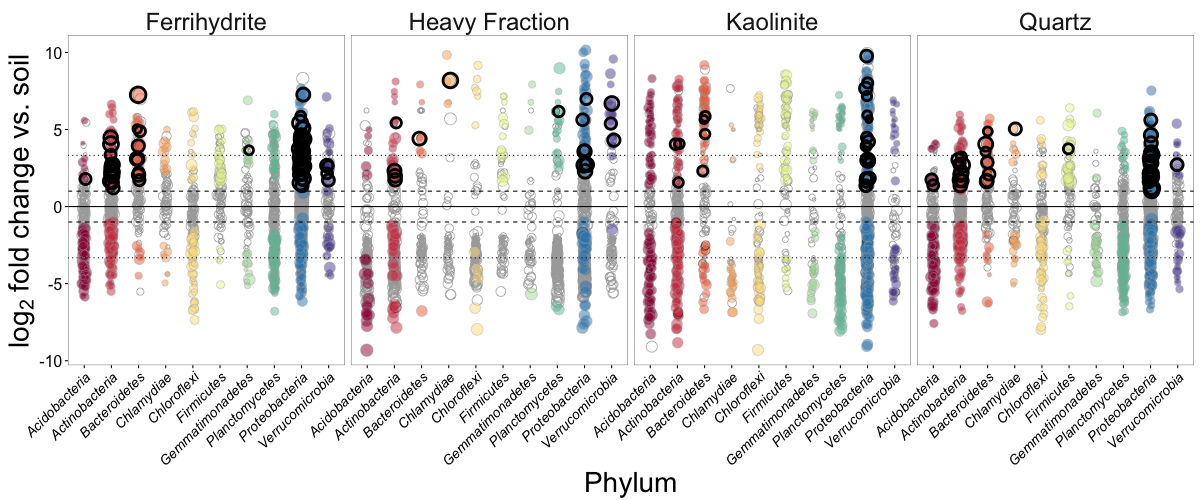

In [551]:
%%R -w 1200 -h 500

d$sig = ifelse(d$padj<=0.1,"yes","NS")
d$sig = ifelse(is.na(d$padj),"NS",paste(d$sig))

d$RootResp = as.factor(d$RootResp)

d.yes = d[d$sig=="yes",]
d.no = d[d$sig=="NS",]
d.RootResp = d[d$RootResp=="1" & d$l2FC>0 & d$sig=="yes",]
# Only showing the root responders that were significant in that mineral

p = ggplot(d, aes(x=Species, y=l2FC, colour = RootResp))
p = p + geom_point(data=d.no, aes(x = Phylum, y = l2FC, size=relabund), shape = 21, alpha=1, colour = "darkgrey", position = position_jitter(w = 0.20))
p = p + geom_point(data=d.yes, aes(x = Phylum, y = l2FC, fill = Phylum, size=relabund), shape = 21, alpha=0.5, position = position_jitter(w = 0.20))
p = p + geom_point(data=d.RootResp, aes(x = Phylum, y = l2FC, size=relabund), shape = 21, stroke = 2, alpha=1, colour="black", position = position_jitter(w = 0.20))

p = p + facet_grid(~Trtmt, scales="free_x")

p = p + scale_size_continuous("log(Relative\nAbundance)",trans="log",guide="none")
    
p = p + geom_hline(yintercept = 1, linetype=2)
p = p + geom_hline(yintercept = -1, linetype=2)
p = p + geom_hline(yintercept = 3.3219, linetype=3)
p = p + geom_hline(yintercept = -3.3219, linetype=3)
p = p + geom_hline(yintercept = 0.0, linetype=1)
# puts in horizontal lines at reference values

colourCount = cutoff
getPalette = colorRampPalette(brewer.pal(cutoff, "Spectral"))
p = p + scale_fill_manual(guide="none", values=c(paste(getPalette(colourCount)),"black"))
p = p + scale_colour_manual(guide="none",values=alpha(c("darkgrey","black"),1))

p = p + theme_bw()
# sets a theme

p = p + theme(strip.text.x = element_text(size = 24),
              strip.text.y = element_text(size = 24),
              axis.text.x = element_text(size = 14, angle = 45, hjust = 1, vjust = 1, face="italic"),
              axis.title.x = element_text(size = 28),
              axis.text.y = element_text(size=16),
              axis.title.y = element_text(size = 28),
              legend.title = element_text(size=20),
              legend.text = element_text(size = 14),
              #legend.position = "none",
              strip.background = element_blank())
# sets a bunch of visual paramters for the legend (none) and other text
    
p = p + labs(x = "Phylum")
# sets the label for the x axis. I think they didn't get the different colours.

p = p + labs(y = expression(paste("", log[2]," fold change vs. soil",sep="")))
# sets the label for the y axes.

p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# Gets rid of the default gridlines

p

In [552]:
%%R
ggsave(filename="DiffAbundRootResp.jpg", plot=p ,width=12, height=6)

In [516]:
%%R
d.RootResp

              Trtmt         OTU     baseMean     l2FC        SE       pvalue
1            Quartz     69_2370   59.5440236 4.651747 0.6734146 4.925667e-12
4            Quartz    58_38953    1.8800536 3.473145 1.3833426 1.204953e-02
27           Quartz    55_44940    1.7021838 4.874833 1.7798673 6.164991e-03
36           Quartz       19_66   42.0143115 1.625349 0.6414663 1.128321e-02
66           Quartz    55_65686   13.2882881 2.099949 0.6777557 1.945780e-03
80           Quartz       56_65  146.9036534 4.054165 1.1048045 2.429524e-04
110          Quartz    71_27748    2.0615885 3.561556 1.4799866 1.610714e-02
142          Quartz     49_2408   12.6123605 2.867388 0.8121629 4.146852e-04
150          Quartz      79_292   30.1190697 1.697227 0.6958971 1.473185e-02
186          Quartz    69_37621    1.3057071 4.630162 1.7526188 8.245376e-03
232          Quartz     67_3677   17.4450116 5.040292 0.9677454 1.905962e-07
330          Quartz     67_8328   17.9867895 2.718637 0.9974570 6.419100e-03

##Getting the fraction of root responders that also responded to minerals

In [424]:
%%R
FractMinRoot = MinRoot/TotalRoot
FractMinRoot = data.frame(FractMinRoot)
FractMinRoot$Timepoint = row.names(FractMinRoot)
FractMinRoot$Names = factor(FractMinRoot$Timepoint, levels = c("X1_3","X1_6","X1_9","X1_12","X2_3","X2_6","X2_9","X2_12"))
FractMinRoot$Names = plyr::revalue(FractMinRoot$Names, c("X1_3"="1_3","X1_6"="1_6","X1_9"="1_9","X1_12"="1_12","X2_3"="2_3","X2_6"="2_6","X2_9"="2_9","X2_12"="2_12"))
# Gets the fraction of original root reponders that also were found to be mineral responders.

In [433]:
%%R
FractMinRoot

      FractMinRoot Timepoint Names
X1_3   0.010050251      X1_3   1_3
X1_6   0.011627907      X1_6   1_6
X1_9   0.016393443      X1_9   1_9
X1_12  0.045774648     X1_12  1_12
X2_3   0.003448276      X2_3   2_3
X2_6   0.027108434      X2_6   2_6
X2_9   0.042666667      X2_9   2_9
X2_12  0.243243243     X2_12  2_12


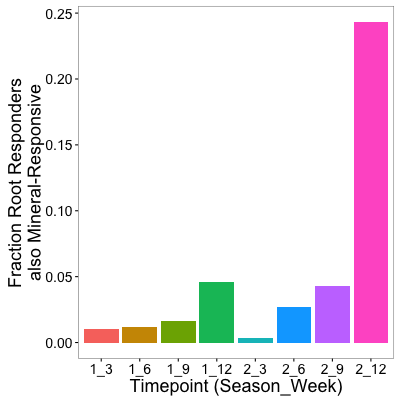

In [425]:
%%R -w 400 -h 400
p = ggplot(FractMinRoot, aes(y=FractMinRoot,x=Names, fill=Names))
p = p + geom_bar(stat="identity")

p = p + theme_bw()
p = p + theme(strip.text.x = element_text(size = 18),
              strip.text.y = element_text(size = 18),
              axis.text.x = element_text(size = 14),
              axis.title.x = element_text(size = 18),
              axis.text.y = element_text(size=14),
              axis.title.y = element_text(size = 18),
              strip.background = element_blank())
p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# Gets rid of the default gridlines
p = p + labs(x = "Timepoint (Season_Week)", y="Fraction Root Responders\nalso Mineral-Responsive")
# sets the label for the axes.

p = p + guides(fill=FALSE)


p

In [426]:
%%R
ggsave(filename="FractRootMinResp.jpg", plot=p ,width=5, height=5)

##Getting the fraction of mineral responders that also responded to roots

In [427]:
%%R

MinRootRespSums = colSums(MinRootResp[,1:4])
# 93 in Heavy, 336 in Ferri, 49 in Quartz, 809 in Kaolinite
MinAllRespSums = colSums(MinAllResp[,1:4])
# How many had some root response?
FractRootMin = MinRootRespSums/MinAllRespSums

In [428]:
%%R
head(d)

   Trtmt       OTU  baseMean     l2FC       SE     pvalue  Kingdom
1 Quartz  73_37380 4.9772368 1.716102 1.887958 0.36336472 Bacteria
2 Quartz  65_11911 0.9298593 1.005215 1.420861 0.47927511 Bacteria
3 Quartz  72_12468 0.6349874 3.505067 1.942905 0.07122598 Bacteria
4 Quartz  74_50643 1.1912872 1.342028 1.376871 0.32971225 Bacteria
5 Quartz 74.2_3363 2.5422823 1.129309 0.918182 0.21871956 Bacteria
6 Quartz  89_15230 2.0957988 1.623852 1.250418 0.19406509 Bacteria
          Phylum                 Class             Order             Family
1 Proteobacteria Epsilonproteobacteria Campylobacterales Campylobacteraceae
2 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
3 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
4 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
5 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
6 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae

In [429]:
%%R
# Need to count each OTU only once?
FractRootMin = d %>%
    group_by(Trtmt)%>%
    summarize(TotalMinResp = sum(MinResp),RootMin = sum(BothResp))%>%
    mutate(FractionCommon=RootMin/TotalMinResp)
FractRootMin$Trtmt = plyr::revalue(FractRootMin$Trtmt, c("Ferrihydrite"="Ferrihydrite","Quartz"="Quartz","Kaolinite"="Kaolinite","Heavy Fraction"="Heavy\nFraction"))
FractRootMin$Trtmt = factor(FractRootMin$Trtmt, levels = c("Ferrihydrite","Quartz","Kaolinite","Heavy\nFraction"))
FractRootMin
#Shows the fraction of mineral responders from each mineral type that also were root responders

# A tibble: 4 × 4
            Trtmt TotalMinResp RootMin FractionCommon
           <fctr>        <dbl>   <dbl>          <dbl>
1    Ferrihydrite          623      92     0.14767255
2 Heavy\nFraction          418      76     0.18181818
3       Kaolinite         1017      83     0.08161259
4          Quartz          635      88     0.13858268


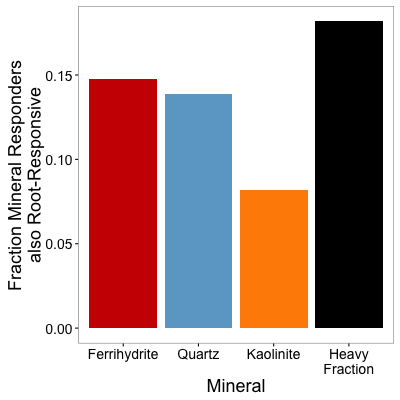

In [430]:
%%R -w 400 -h 400
p = ggplot(FractRootMin, aes(y=FractionCommon,x=Trtmt, fill=Trtmt))
p = p + geom_bar(stat="identity")

p = p + theme_bw()
p = p + theme(strip.text.x = element_text(size = 18),
              strip.text.y = element_text(size = 18),
              axis.text.x = element_text(size = 14),
              axis.title.x = element_text(size = 18),
              axis.text.y = element_text(size=14),
              axis.title.y = element_text(size = 18),
              strip.background = element_blank())
p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# Gets rid of the default gridlines

p = p + scale_fill_manual(values=c("red3","skyblue3","darkorange","black","chartreuse4","gold1"))

p = p + labs(x = "Mineral", y="Fraction Mineral Responders\nalso Root-Responsive")
# sets the label for the axes.

p = p + guides(fill=FALSE)


p

In [432]:
%%R
ggsave(filename="FractMinRootResp.jpg", plot=p ,width=5, height=5)

###Next / last thing I want to do is look at it more phylogenetically, maybe?

In [439]:
%%R
# What is the taxonomic ID of all the common responders?
head(d[d$BothResp==1,])

    Trtmt      OTU  baseMean      l2FC        SE      pvalue  Kingdom
23 Quartz 55_44940  1.702184 4.8748330 1.7798673 0.006164991 Bacteria
32 Quartz    19_66 42.014312 1.6253495 0.6414663 0.011283205 Bacteria
46 Quartz 62_97837  1.638830 0.7612736 1.2453540 0.541007037 Bacteria
47 Quartz  44_4657  4.881528 1.1837056 1.0917483 0.278263101 Bacteria
61 Quartz 89_38255  0.862409 1.4062494 1.3916012 0.312243263 Bacteria
62 Quartz 55_65686 13.288288 2.0999487 0.6777557 0.001945780 Bacteria
          Phylum         Class           Order           Family    Genus
23 Bacteroidetes [Saprospirae] [Saprospirales] Chitinophagaceae     <NA>
32 Bacteroidetes [Saprospirae] [Saprospirales] Chitinophagaceae     <NA>
46 Bacteroidetes [Saprospirae] [Saprospirales] Chitinophagaceae     <NA>
47 Bacteroidetes [Saprospirae] [Saprospirales] Chitinophagaceae     <NA>
61 Bacteroidetes [Saprospirae] [Saprospirales] Chitinophagaceae Niabella
62 Bacteroidetes [Saprospirae] [Saprospirales] Chitinophagaceae     <NA>

In [545]:
%%R
# Basically want to summarize the types of bacteria that are common responders.
d.plot = d %>%
    filter(BothResp==1)%>%
    filter(l2FC>=0)%>%
    filter(sig=="yes")%>%
    select(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species,sig)%>%
    distinct(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species)
d.plot = d.plot %>%
    group_by(Phylum,Class,Order,Family)%>%
    summarize(TotalOTUs = n())%>%
    arrange(-TotalOTUs) %>%
    group_by()%>%
    mutate(FractTotal=TotalOTUs/sum(TotalOTUs))
d.plot[,3:6]

# A tibble: 47 × 4
                  Order                Family TotalOTUs FractTotal
                 <fctr>                <fctr>     <int>      <dbl>
1       [Saprospirales]      Chitinophagaceae         9 0.08490566
2      Sphingomonadales     Sphingomonadaceae         9 0.08490566
3      Rhodospirillales     Rhodospirillaceae         6 0.05660377
4       Burkholderiales        Comamonadaceae         6 0.05660377
5       Caulobacterales      Caulobacteraceae         5 0.04716981
6       Xanthomonadales      Xanthomonadaceae         5 0.04716981
7       Actinomycetales     Streptomycetaceae         4 0.03773585
8    Sphingobacteriales   Sphingobacteriaceae         4 0.03773585
9  [Chthoniobacterales] [Chthoniobacteraceae]         4 0.03773585
10      Actinomycetales       Nocardioidaceae         3 0.02830189
# ... with 37 more rows


In [536]:
%%R
d.plot = d %>%
    filter(BothResp==1)%>%
    filter(l2FC>=0)%>%
    filter(sig=="yes")%>%
    select(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species,sig)%>%
    distinct(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species)
d.plot = d.plot %>%
    group_by(Phylum,Class,Order)%>%
    summarize(TotalOTUs = n())%>%
    arrange(-TotalOTUs) %>%
    group_by()%>%
    mutate(FractTotal=TotalOTUs/sum(TotalOTUs))
d.plot[,1:5]

# A tibble: 28 × 5
           Phylum               Class              Order TotalOTUs FractTotal
            <ord>              <fctr>             <fctr>     <int>      <dbl>
1  Actinobacteria      Actinobacteria    Actinomycetales        15 0.14150943
2  Proteobacteria Alphaproteobacteria        Rhizobiales        11 0.10377358
3   Bacteroidetes       [Saprospirae]    [Saprospirales]         9 0.08490566
4  Proteobacteria Alphaproteobacteria   Sphingomonadales         9 0.08490566
5  Proteobacteria  Betaproteobacteria    Burkholderiales         9 0.08490566
6  Proteobacteria Gammaproteobacteria    Xanthomonadales         8 0.07547170
7  Proteobacteria Alphaproteobacteria   Rhodospirillales         6 0.05660377
8   Bacteroidetes    Sphingobacteriia Sphingobacteriales         5 0.04716981
9  Proteobacteria Alphaproteobacteria    Caulobacterales         5 0.04716981
10 Proteobacteria Deltaproteobacteria       Myxococcales         4 0.03773585
# ... with 18 more rows


In [537]:
%%R
d.plot = d %>%
    filter(BothResp==1)%>%
    filter(l2FC>=0)%>%
    filter(sig=="yes")%>%
    select(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species,sig)%>%
    distinct(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species)
d.plot = d.plot %>%
    group_by(Phylum,Class)%>%
    summarize(TotalOTUs = n())%>%
    arrange(-TotalOTUs) %>%
    group_by()%>%
    mutate(FractTotal=TotalOTUs/sum(TotalOTUs))
d.plot[,1:4]

# A tibble: 24 × 4
            Phylum               Class TotalOTUs FractTotal
             <ord>              <fctr>     <int>      <dbl>
1   Proteobacteria Alphaproteobacteria        32 0.30188679
2   Actinobacteria      Actinobacteria        15 0.14150943
3    Bacteroidetes       [Saprospirae]         9 0.08490566
4   Proteobacteria  Betaproteobacteria         9 0.08490566
5   Proteobacteria Gammaproteobacteria         8 0.07547170
6    Bacteroidetes    Sphingobacteriia         5 0.04716981
7   Proteobacteria Deltaproteobacteria         4 0.03773585
8  Verrucomicrobia    [Spartobacteria]         4 0.03773585
9    Acidobacteria      Acidobacteriia         2 0.01886792
10      Chlamydiae          Chlamydiia         2 0.01886792
# ... with 14 more rows


In [539]:
%%R
d.plot = d %>%
    filter(BothResp==1)%>%
    filter(l2FC>=0)%>%
    filter(sig=="yes")%>%
    select(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species,sig)%>%
    distinct(OTU,Kingdom,Phylum,Class,Order,Family,Genus,Species)
d.plot = d.plot %>%
    group_by(Phylum)%>%
    summarize(TotalOTUs = n())%>%
    arrange(-TotalOTUs) %>%
    group_by()%>%
    mutate(FractTotal=TotalOTUs/sum(TotalOTUs))
d.plot[,1:3]

# A tibble: 15 × 3
             Phylum TotalOTUs  FractTotal
              <ord>     <int>       <dbl>
1    Proteobacteria        53 0.500000000
2    Actinobacteria        17 0.160377358
3     Bacteroidetes        14 0.132075472
4   Verrucomicrobia         6 0.056603774
5   Armatimonadetes         3 0.028301887
6     Acidobacteria         2 0.018867925
7        Chlamydiae         2 0.018867925
8     Fibrobacteres         2 0.018867925
9     Elusimicrobia         1 0.009433962
10              FBP         1 0.009433962
11       Firmicutes         1 0.009433962
12 Gemmatimonadetes         1 0.009433962
13   Planctomycetes         1 0.009433962
14              TM6         1 0.009433962
15              TM7         1 0.009433962


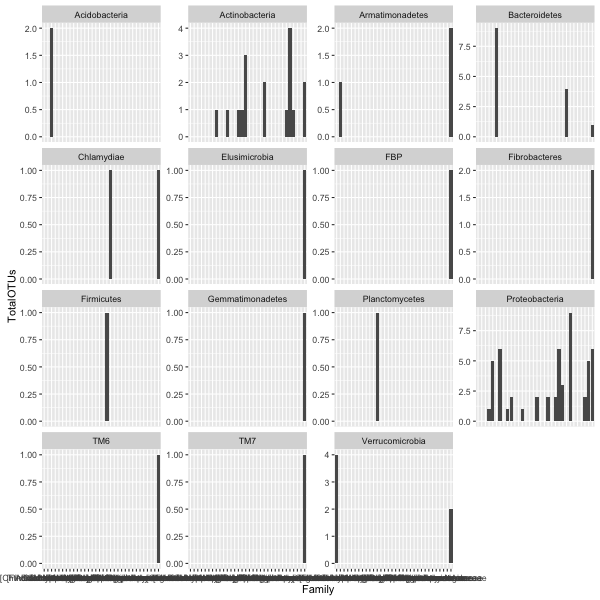

In [522]:
%%R -h 600 -w 600
p = ggplot(d.plot, aes(Family,TotalOTUs))
p = p + geom_bar(stat="identity")
p = p + facet_wrap(~Phylum, scales="free_y")
p

### What about ordinations of the responders only?

In [4]:
%%R
physeq = import_biom("../data/AllRespOTUTable.tax.biom", parseFunction = parse_taxonomy_greengenes)
# Importing the biom file of our OTU table, with the taxonomy data, etc.

In [ ]:
### probably need to re-classify all the OTUs taht are responders anywehre

In [28]:
%%R
samples(otu_table(physeq))


Error in withVisible({ : could not find function "samples"


/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in withVisible({ : could not find function "samples"

  warnings.warn(x, RRuntimeWarning)


In [19]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.full = ordinate(physeq, method = "NMDS", distance = "bray", weighted=TRUE, k=2, trymax=100)
# Consider trymax= and k=3

Run 0 stress 9.705394e-05 
Run 1 stress 0.002552001 
Run 2 stress 9.742157e-05 
... Procrustes: rmse 0.257575  max resid 0.4097709 
Run 3 stress 9.046661e-05 
... New best solution
... Procrustes: rmse 0.2327645  max resid 0.4479062 
Run 4 stress 9.307343e-05 
... Procrustes: rmse 0.243524  max resid 0.5541087 
Run 5 stress 9.403586e-05 
... Procrustes: rmse 0.2473199  max resid 0.5156756 
Run 6 stress 9.775474e-05 
... Procrustes: rmse 0.2559759  max resid 0.4759982 
Run 7 stress 8.896067e-05 
... New best solution
... Procrustes: rmse 0.2697111  max resid 0.5674802 
Run 8 stress 9.072857e-05 
... Procrustes: rmse 0.2457491  max resid 0.5772597 
Run 9 stress 0.00120566 
Run 10 stress 9.575025e-05 
... Procrustes: rmse 0.2661486  max resid 0.581149 
Run 11 stress 0.0007984776 
Run 12 stress 9.185592e-05 
... Procrustes: rmse 0.2595062  max resid 0.4912175 
Run 13 stress 7.174422e-05 
... New best solution
... Procrustes: rmse 0.2028589  max resid 0.5354309 
Run 14 stress 9.085052e-05 


In [25]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(physeq, D, type = "samples", colour = "samples")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0,1),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p


Error in plot_ordination(physeq, D, type = "samples", colour = "samples") : 
  unused argument (colour = "samples")


/opt/virt_env/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in plot_ordination(physeq, D, type = "samples", colour = "samples") : 
  unused argument (colour = "samples")

  warnings.warn(x, RRuntimeWarning)
